In [2]:
import pandas as pd
covid_data=pd.read_csv('data/covid_data.csv', sep=',')
covid_data.head()

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [7]:
import pandas as pd
vaccinations_data  =pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data .head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [8]:
#Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. 
# Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [9]:
#Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [10]:
#Создадим признак больных на данный момент (active). 
# Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [11]:
#Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. 
# Для этого отсортируем данные по названиям стран, а затем по датам.
# После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [12]:
#В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [13]:
#За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до  2021-05-29 00:00:00


In [15]:
#За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.
print(f"Данные о заболеваемости предоставлены от {vaccinations_data['date'].min()} до  {vaccinations_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-12-02 00:00:00 до  2021-09-06 00:00:00


In [16]:
#С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
#Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. 
# То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. 
#Результат объединения занесите в переменную covid_df.
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])


Число строк:  86785
Число столбцов:  16


In [17]:
#Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

In [18]:
#Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

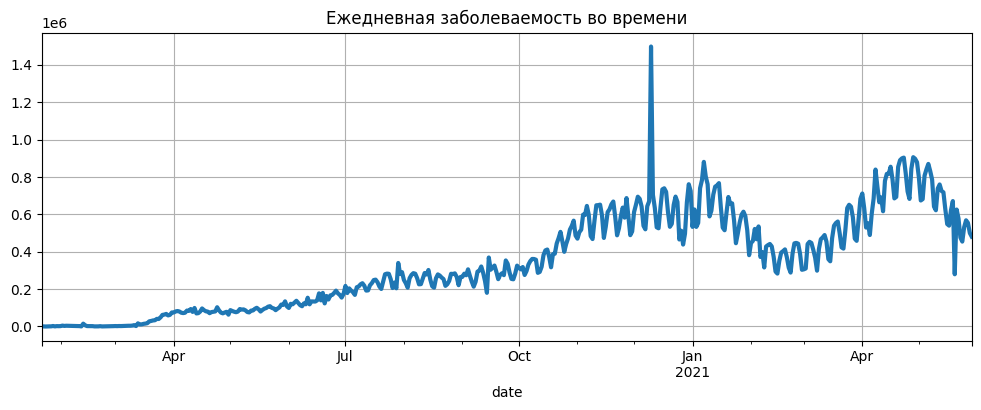

In [19]:
#Основным методом для создания простейших графиков в Pandas является plot().
#отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени.
# Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
#построить график с помощью метода plot(). Будем использовать линейный график размером 12x4
#Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

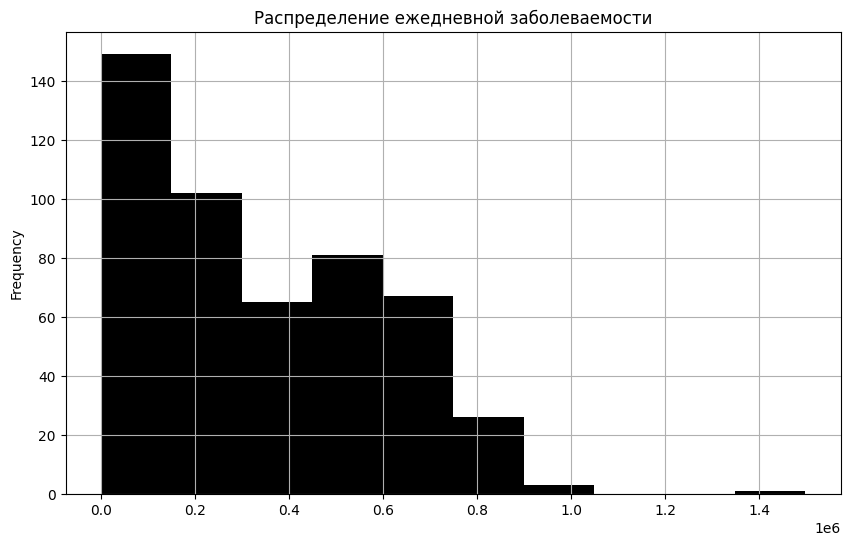

In [20]:
#построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. 
# Для этого параметр kind выставляем на значение 'hist'. 
# Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

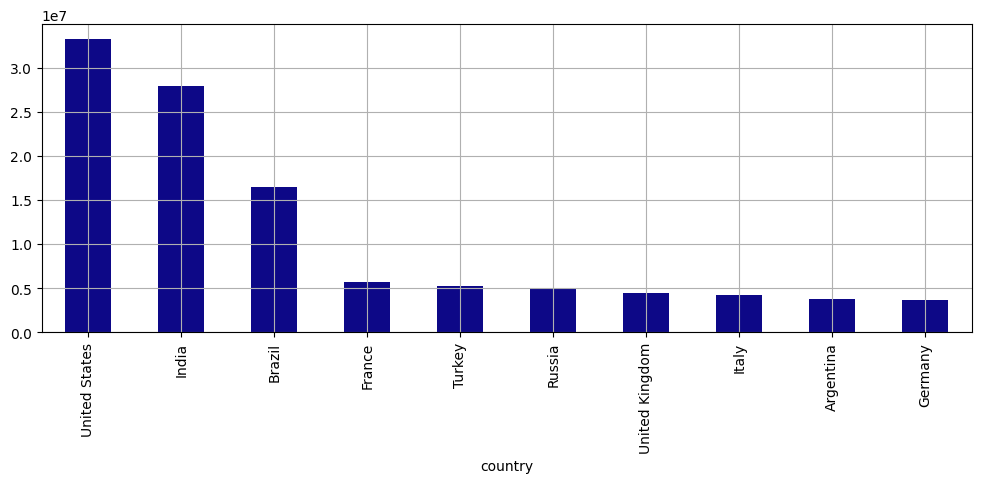

In [21]:
#построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

#Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last()
# — он возвращает последнее значение в столбце DataFrame.

#Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. 
# Параметр colormap отвечает за цветовую гамму графика.
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);


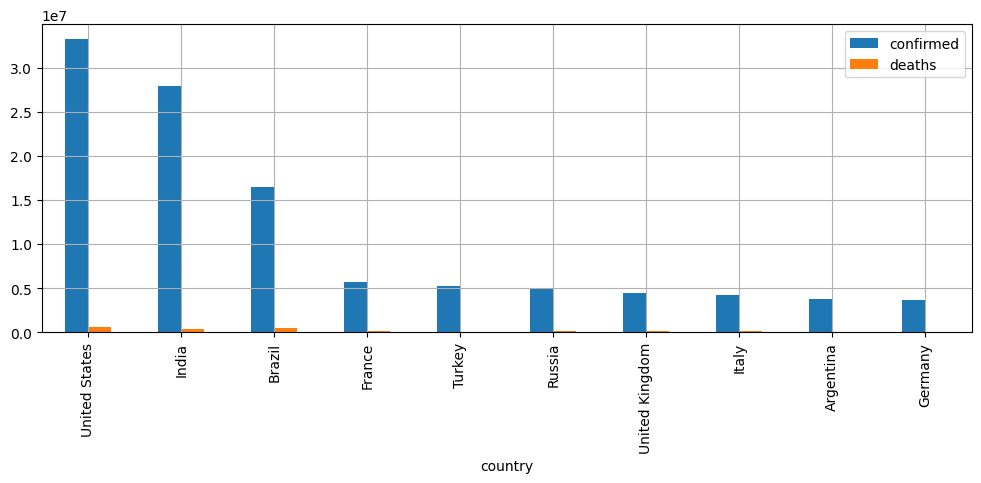

In [22]:
#как в этих десяти странах соотносится количество заболевших и умерших от вируса. 
# Для этого отобразим сразу два показателя на столбчатой диаграмме: 
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

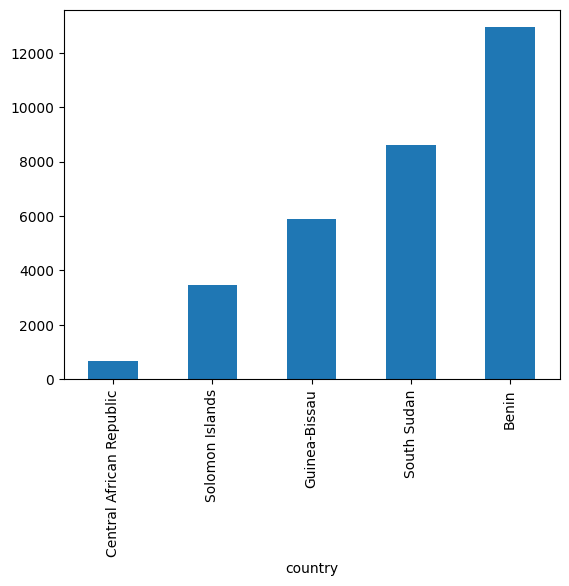

In [23]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [24]:
#ля более корректного отображения графиков в ноутбуках используется команда %matplotlib inline.
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Если вы используете тёмную тему в VS Code, 
# то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:
plt.style.use('default')

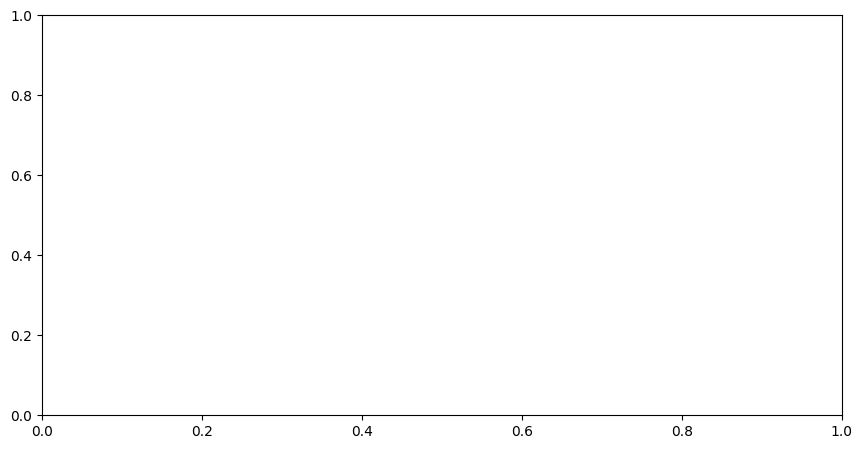

In [26]:
#сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, 
# например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). 
# К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. 
# Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат.
# В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области 
# (100%, ширина и высота равны 1).
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

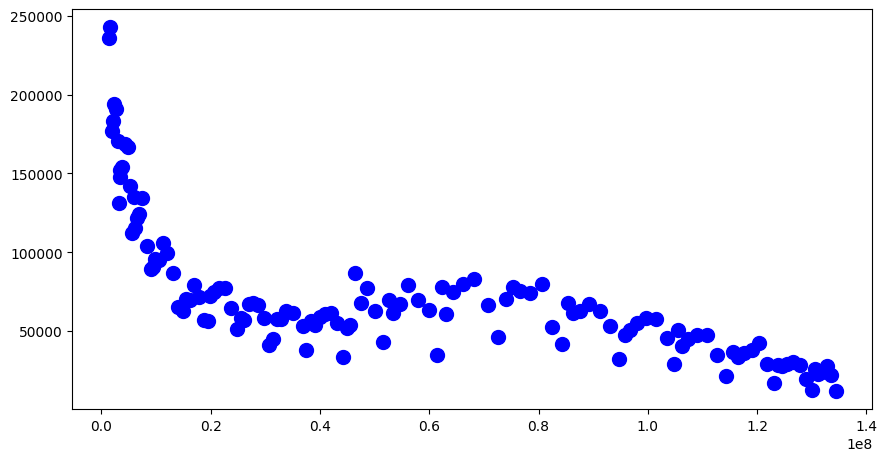

In [27]:
#построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) 
# от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.
#На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);


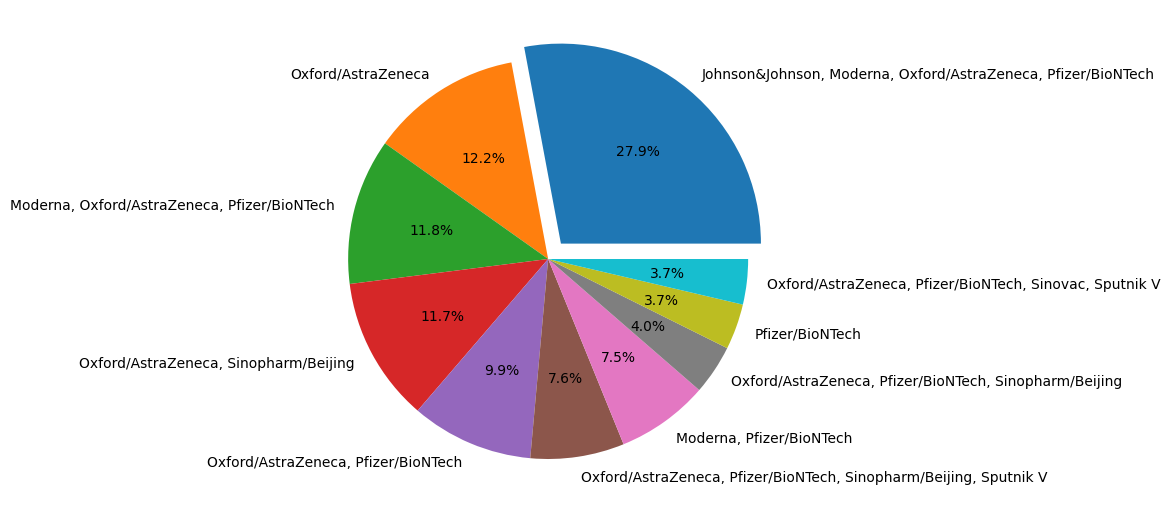

In [28]:
#Для построения круговых диаграмм в Matplotlib используется метод pie().
#ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. 
# Будем отображать доли в процентах и округлять их до одного знака после запятой. 
# Самую распространённую вакцину сместим на 10 % от центра:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

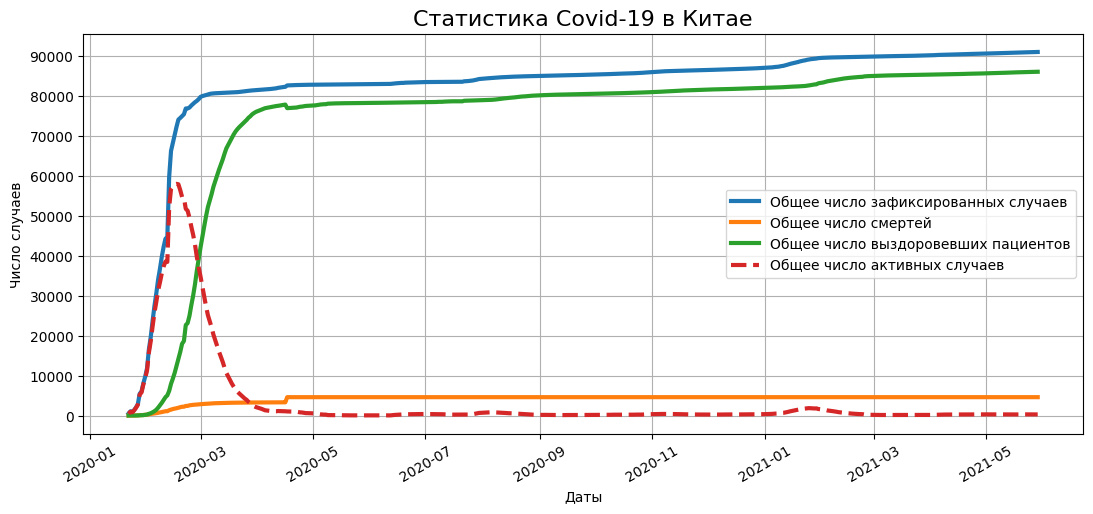

In [29]:
#изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), 
# выздоровевших пациентов (recovered) и активных случаев (active) в Китае.
#Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде,
# а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, 
# повернём метки по оси x на 30 градусов, 
# а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();


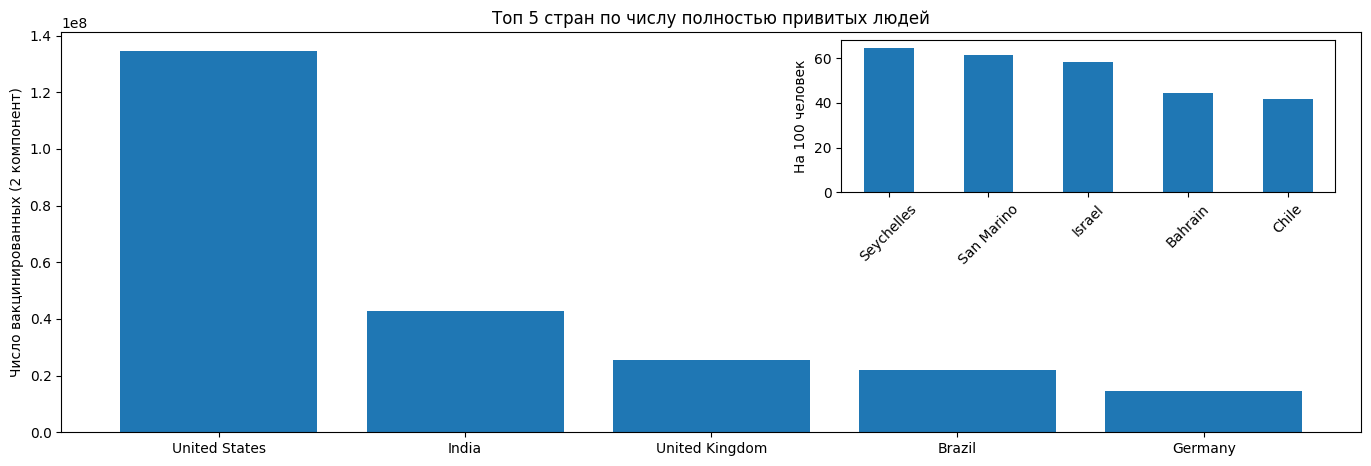

In [30]:
# отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), 
# а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).
# Для этого построим столбчатые диаграммы с помощью метода bar().
#x — названия категорий, которые будут располагаться по оси абсцисс;
#height — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);
#width — ширина столбцов диаграммы;
#color — цвет.
#Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() 
# выбираем ТОП-5 стран с использованием метода nlargest().
# При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

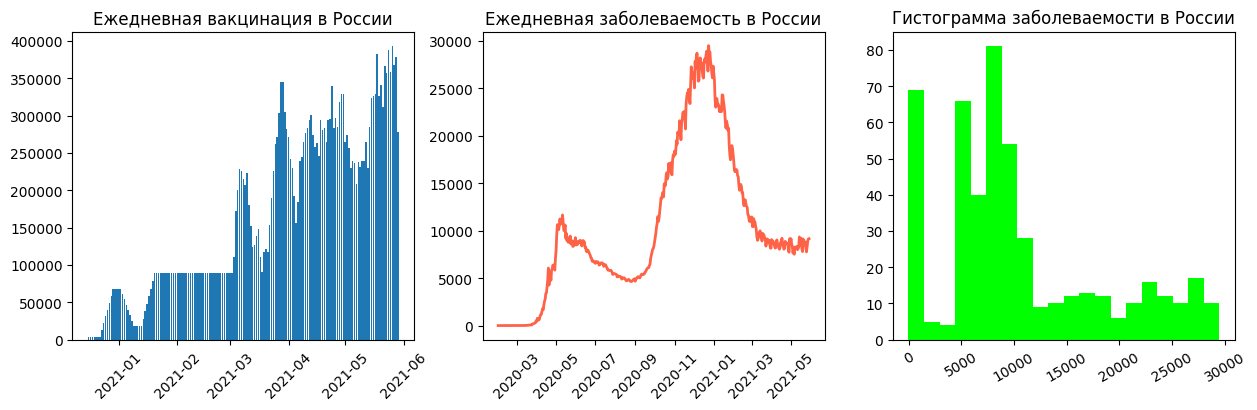

In [31]:
# Гистограммы hist()
#x — массив чисел, для которого строится гистограмма;
#bins — число столбцов (корзин);
#orientation — ориентация гистограммы (по умолчанию 'vertical');
#color — цвет.
#Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)